# BLM example

In [1]:
# Add pytwoway to system path, do not run this
import sys
sys.path.append('../../..')

In [2]:
# Import the pytwoway package 
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw
import pandas as pd
from matplotlib import pyplot as plt

## Simulate some data

The package contains functions to simulate data. We use this here to keep things simple.

In [3]:
# For the example, we simulate data
# Set parameter choices
nl = 2 # Number of worker types
nk = 3 # Number of firm types
fsize = 10 # Max number of employees at a firm
mmult = 100 # Increase observations for movers x100
smult = 100 # Increase observations for stayers x100
blm_true = tw.BLMModel({
    'nl': nl, # Number of worker types
    'nk': nk, # Number of firm types
    'simulation': True # Simulating data
})
sim_data = blm_true._m2_mixt_simulate_sim(fsize=fsize, mmult=mmult, smult=smult)
display(sim_data['jdata'])
display(sim_data['sdata'])

,l,y1,y2,j1,j2,j1true,j2true,f1,f2
0,0,1.169089,0.692001,0,0,0,0,F90,F70
1,0,0.218219,0.403516,0,0,0,0,F62,F39
2,0,0.529001,0.562833,0,0,0,0,F16,F100
3,0,0.834612,-0.013236,0,0,0,0,F32,F87
4,0,-0.441192,0.992421,0,0,0,0,F75,F73
...,...,...,...,...,...,...,...,...,...
8995,0,0.782915,1.718563,2,2,2,2,F79,F45
8996,1,0.824797,1.746390,2,2,2,2,F69,F38
8997,0,1.162404,1.674061,2,2,2,2,F85,F27
8998,1,1.891313,1.751884,2,2,2,2,F61,F20


,k,y1,y2,j1,j2,x,f1,j1true,f2
0,1,0.688641,0.479007,0,0,1,F26,0,F26
1,1,1.032119,0.949913,0,0,1,F23,0,F23
2,1,0.336394,0.420970,0,0,1,F22,0,F22
3,0,0.396887,1.151061,0,0,1,F65,0,F65
4,1,0.338132,0.427093,0,0,1,F12,0,F12
...,...,...,...,...,...,...,...,...,...
2995,1,1.489740,0.562589,2,2,1,F92,2,F92
2996,1,0.162369,1.282093,2,2,1,F26,2,F26
2997,1,1.920471,0.443843,2,2,1,F58,2,F58
2998,1,1.317292,1.600152,2,2,1,F43,2,F43


## Initialize and run BLMEstimator

In [4]:
## Optional Parameters ##
user_blm = {
    # Class parameters
    'nl': nl, # Number of worker types
    'nk': nk, # Number of firm types
    'fixb': False, # Set A2 = np.mean(A2, axis=0) + A1 - np.mean(A1, axis=0)
    'stationary': False, # Set A1 = A2
    # fit() parameters
    'n_iters': 100, # Max number of iterations
    'threshold': 1e-7, # Threshold to break EM loop
    'd_prior': 1.0001, # Value >= 1, account for probabilities being too small
    'verbose': 0, # If 0, print no output; if 1, print additional output; if 2, print maximum output
}
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(user_blm)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data['jdata'], sdata=sim_data['sdata'], n_init=20, n_best=5, ncore=4)

100%|██████████| 20/20 [00:04<00:00,  4.93it/s]


## Finally, we can investigate the results

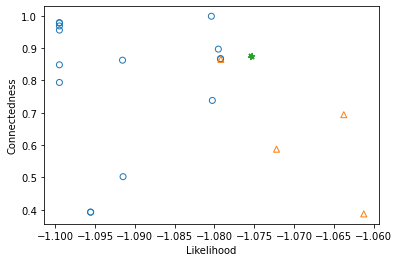

In [8]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

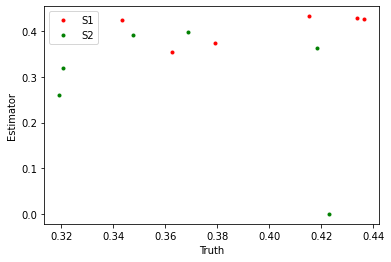

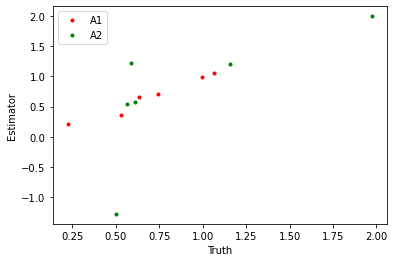

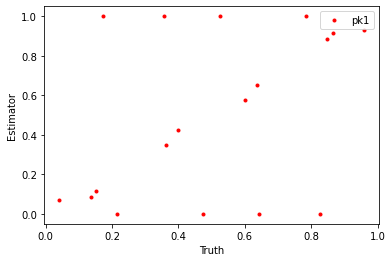

In [6]:
# Plot parameter truth vs. estimates
plt.plot(blm_true.S1.flatten(), blm_fit.model.S1.flatten(), '.', label='S1', color='red')
plt.plot(blm_true.S2.flatten(), blm_fit.model.S2.flatten(), '.', label='S2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()

plt.plot(blm_true.A1.flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(blm_true.A2.flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()

plt.plot(blm_true.pk1.flatten(), blm_fit.model.pk1.flatten(), '.', label='pk1', color='red')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()